In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import WhitespaceTokenizer
import urllib
from wordcloud import WordCloud

In [2]:
# 데이터 읽기
df = pd.read_csv(r'\Users\dataAnalysis-project\JYS\3.EDA\jobkorea_saramin_recruit.csv', index_col=0, encoding='cp949')
print(df.shape)
df.head(3)

(47645, 10)


,resource,company,duty,career,degree,work_place,work_type,category,link,info
0,jobkorea,디휴브(DEHUV),[디휴브] 개발자 부문채용,신입·경력,학력무관,경기 고양시,정규직,"['반응형 웹, 백엔드, 풀스택, 하이브리드 앱, 소프트웨어개발, BigData, ...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/d...
1,jobkorea,㈜레미유코스메틱,브랜드 디자이너 / MD / (카페)쇼룸 매니저 채용,경력,학력무관,서울 성동구,정규직 외\r\n,"['화장품, 마케팅, 마케팅기획, 브랜딩, 프로모션, 상품기획, 신상품개발, 온라인...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/l...
2,jobkorea,㈜순진,마케팅 담당자 및 상품기획/MD 경력직 채용,경력2년↑,고졸↑,서울 광진구,정규직,"['영상편집, 포토샵, 제품기획, 광고기획, 마케팅, 마케팅기획, 바이럴마케팅, 브...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/s...


## 서울 시군구별 채용공고 올린 갯수 비교

In [3]:
place = df[df['work_place'].str.contains('서울') ]
place = place['work_place']

In [4]:
place2 = pd.DataFrame(place)

In [5]:
place2.replace(['서울', '외', '전체', '전지역'], '', regex=True, inplace=True)
place3 = place2['work_place']
len(place3)

30126

In [6]:
tokenizer = WhitespaceTokenizer()

In [7]:
tokens4 = tokenizer.tokenize(' '.join(place3))
counter4 = Counter(tokens4)
counter4.most_common()

[('강남구', 7868),
 ('서초구', 3001),
 ('금천구', 2957),
 ('영등포구', 2110),
 ('구로구', 1912),
 ('마포구', 1805),
 ('송파구', 1439),
 ('성동구', 1409),
 ('중구', 1348),
 ('강서구', 1041),
 ('종로구', 730),
 ('용산구', 637),
 ('광진구', 270),
 ('동작구', 237),
 ('동대문구', 235),
 ('관악구', 227),
 ('양천구', 191),
 ('서대문구', 190),
 ('강동구', 190),
 ('중랑구', 188),
 ('성북구', 170),
 ('노원구', 102),
 ('은평구', 96),
 ('도봉구', 61),
 ('강북구', 54)]

In [8]:
type(counter4)

collections.Counter

In [9]:
df_work_place = pd.DataFrame.from_dict(counter4, orient='index').reset_index()
df_work_place.rename(columns={'index':'district', 0:'count'}, inplace=True)
df_work_place = df_work_place.sort_values(by='count' ,ascending=False)

In [10]:
df_work_place.set_index("district", inplace=True)
df_work_place.head()

,count
district,
강남구,7868
서초구,3001
금천구,2957
영등포구,2110
구로구,1912


In [11]:
df_work_place.describe()

,count
count,25.000000
mean,1138.720000
std,1670.011515
min,54.000000
25%,190.000000
50%,270.000000
75%,1439.000000
max,7868.000000


## 서울 구별 채용건수 시각화 표현

In [12]:
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
#mpl.rc('font', family='AppleGothic') #맥
mpl.rcParams['axes.unicode_minus'] = False

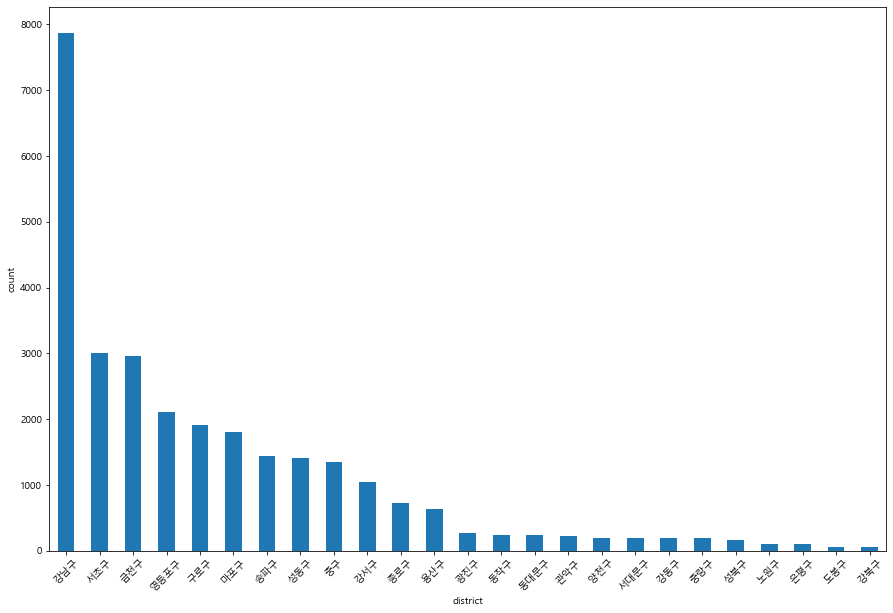

In [13]:
plt.figure(figsize=(15, 10))
df_work_place['count'].plot(kind="bar")
plt.xlabel('district')
plt.ylabel('count')
plt.xticks(rotation = 45)

plt.show()

## 채용공고 요구 학력 분포 시각화 표현

In [14]:
# degree 컬럼
df['degree'].value_counts()

학력무관         24015
초대졸↑          6945
대학교(4년)↑      4853
대학(2,3년)↑     4659
대졸↑           3879
고졸↑           2888
석사↑            308
-               65
박사↑             23
박사              10
Name: degree, dtype: int64

In [15]:
# df.drop(df.loc[df['degree']=='서울 마포구'].index,inplace=True)
df['degree'] = df['degree'].str.replace('초대졸↑','대학(2,3년)↑')
df['degree'] = df['degree'].str.replace('대졸↑','대학교(4년)↑')
df['degree'] = df['degree'].str.replace('박사','박사↑')

In [16]:
df['degree'] = df['degree'].str.replace('박사↑↑','박사↑')

In [17]:
df['degree'].value_counts()

학력무관         24015
대학(2,3년)↑    11604
대학교(4년)↑      8732
고졸↑           2888
석사↑            308
-               65
박사↑             33
Name: degree, dtype: int64

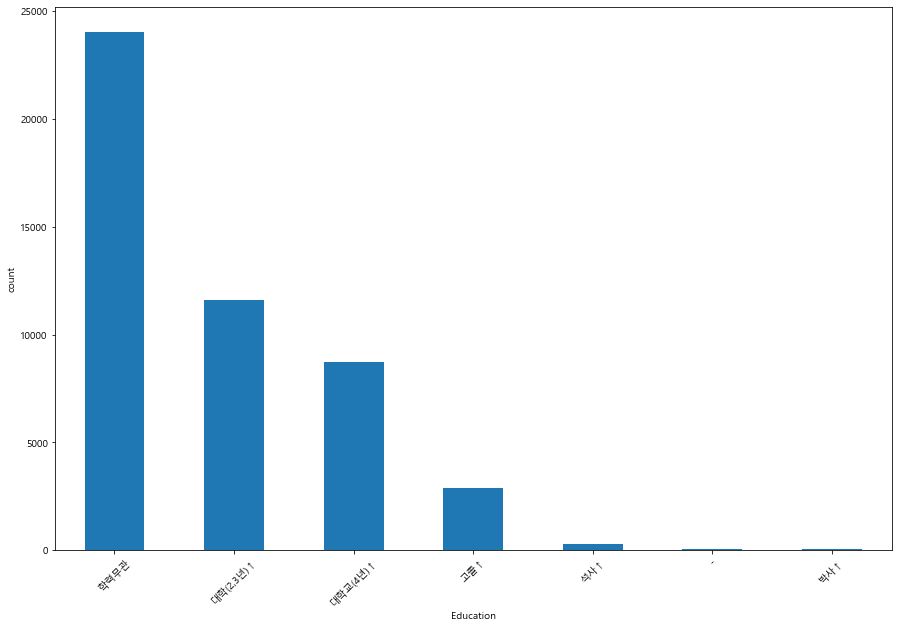

In [18]:
plt.figure(figsize=(15, 10))
df['degree'].value_counts().plot(kind="bar")
plt.xlabel('Education')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()